### Loading the packages

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Red blood cells absorb light. So when haemoglobin levels are high, red blood cell count or number of red blood cells produced is high. Which means that when haemoglobin is high, as number of red blood cells are high, most of the light will be absorbed and less will be reflected. Therefore, haemoglobin level and level of reflection are inversely related. That is when haemoglobin level is high, level of reflection is low and vice versa.

### Loading the data

In [42]:
df_new = pd.read_excel("Haemoglobin_ga.xlsx")
df_new.head()

,RecNo,Serial,Hospital ID,Age,Gender,s0,s1,s2,s3,s4,...,s91,s92,s93,s94,s95,s96,s97,s98,s99,HB
0,1,3790,0,21.0,Female,1.111572,1.089060,1.070785,1.054095,1.038819,...,0.550573,0.548618,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5
1,2,3801,0,28.0,Male,1.094853,1.077337,1.063737,1.050125,1.036282,...,0.581667,0.580230,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0
2,3,3803,0,27.0,Male,0.926640,0.911944,0.899565,0.887503,0.872969,...,0.484327,0.483731,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3
3,4,3832,0,27.0,Female,0.885337,0.871370,0.855679,0.837118,0.816210,...,0.431343,0.431123,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0
4,5,3833,0,21.0,Male,0.997230,0.980019,0.967419,0.954938,0.940028,...,0.538744,0.537118,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5


In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101765 entries, 0 to 101764
Columns: 106 entries, RecNo to HB
dtypes: float64(102), int64(3), object(1)
memory usage: 82.3+ MB


In [44]:
df_new.describe()
df_new['Serial'].nunique()

2455

In [45]:
df_1 = df_new.drop(['Hospital ID','RecNo'],axis = 1)

In [46]:
with_ga = df_1.dropna()

In [47]:
wo_ga = df_1.drop(['Age','Gender'],axis = 1)

In [48]:
wo_ga_x = wo_ga.drop(['HB','Serial'], axis = 1)
cols = wo_ga_x.columns.values
cols

array(['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
       's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
       's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28',
       's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37',
       's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46',
       's47', 's48', 's49', 's50', 's51', 's52', 's53', 's54', 's55',
       's56', 's57', 's58', 's59', 's60', 's61', 's62', 's63', 's64',
       's65', 's66', 's67', 's68', 's69', 's70', 's71', 's72', 's73',
       's74', 's75', 's76', 's77', 's78', 's79', 's80', 's81', 's82',
       's83', 's84', 's85', 's86', 's87', 's88', 's89', 's90', 's91',
       's92', 's93', 's94', 's95', 's96', 's97', 's98', 's99'],
      dtype=object)

### Exploratory Data Analysis

In [49]:
from ipywidgets import widgets
def scatter(col):
    plt.figure()
    sns.scatterplot(wo_ga[col] , wo_ga['HB'])
    plt.title("Scatterplot of " + str(col) + " VS Actual HB")
    plt.show()
widgets.interact(scatter , col = list(cols))

interactive(children=(Dropdown(description='col', options=('s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8…

<function __main__.scatter(col)>

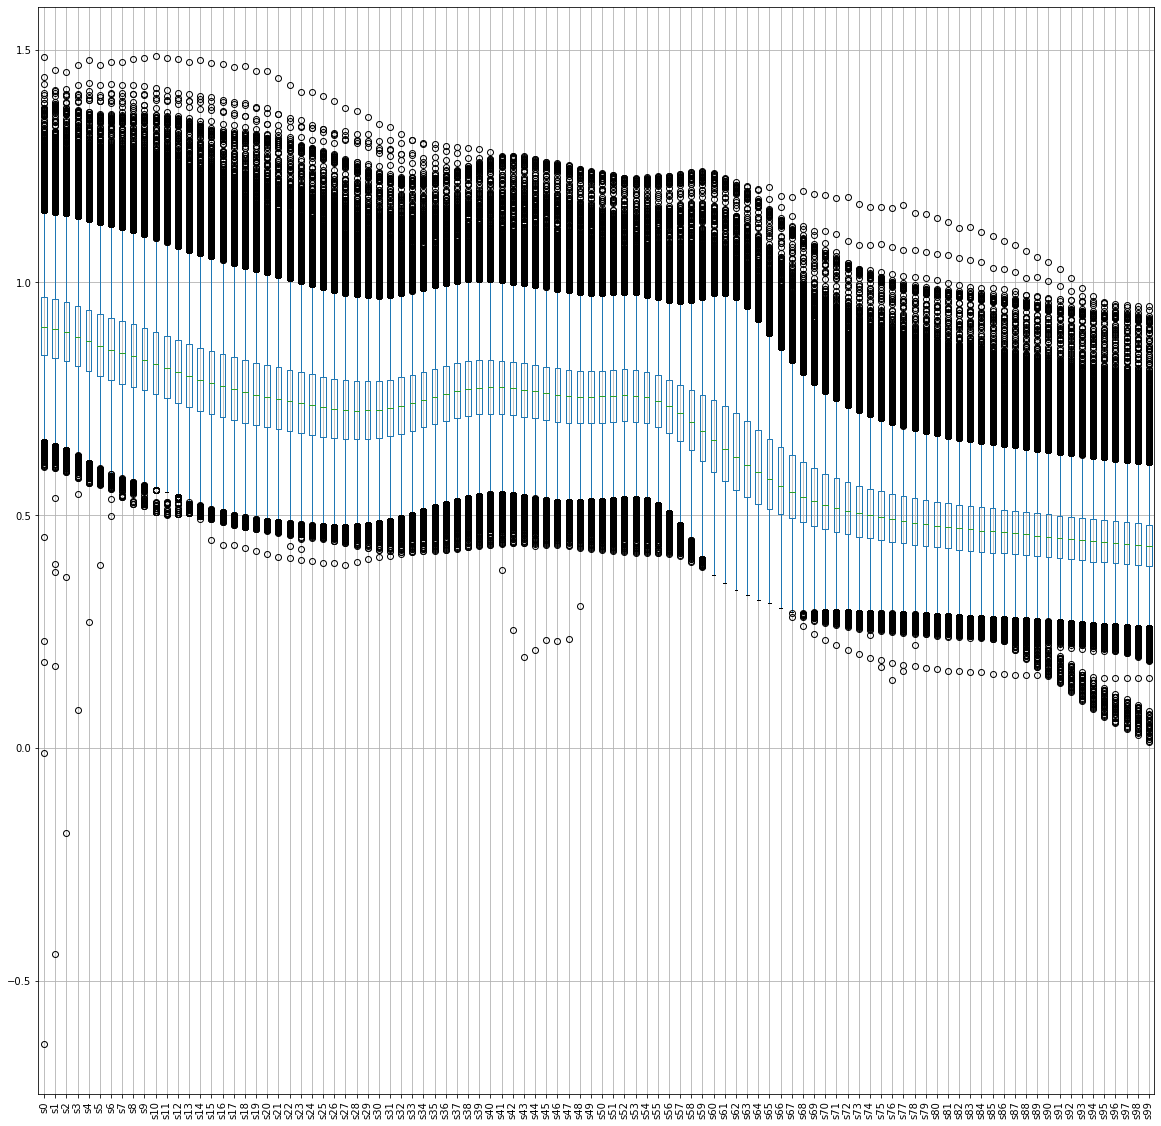

In [50]:
plt.figure(figsize = (20,20))
wo_ga_x.boxplot()
plt.xticks(rotation = 90)
plt.show()

### Pre-Model Building 

In [51]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [52]:
X = wo_ga.drop(['HB','Serial'],axis = 1)
y = wo_ga['HB']

#### Scaling the variables

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_x = sc.fit_transform(X)

#### Execution time of linear model  before pca

In [14]:
import time
start = time.time()
LinearRegression().fit(scale_x,y)
end = time.time()
print(end - start)

0.3282356262207031


In [54]:
y = y.astype('str')

### LDA

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components = 10)
clf_x = clf.fit_transform(scale_x,y)

In [15]:
clf_df = pd.DataFrame(clf_x , columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10'])
clf_df['HB'] = y

In [16]:
clf_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,HB
0,1.264587,-1.217288,-1.410457,-0.996643,-0.631116,2.469779,-1.168010,-2.367780,-0.425383,-1.972000,10.5
1,1.097341,-0.745310,-1.249305,-0.379043,-0.307769,3.325848,-0.454660,-1.932948,-1.670048,-1.198510,13.0
2,0.835877,-0.975295,-0.539631,0.909145,0.112365,2.862061,1.416161,-1.622361,-1.630977,-1.179415,13.3
3,0.930456,-1.500375,-0.874989,-0.517044,0.669442,2.289481,1.197514,-2.195256,0.271153,-2.431953,10.0
4,0.742832,-1.878234,-1.659462,0.320726,-0.863125,1.926868,-2.192844,-3.629018,0.889911,-2.414038,10.5


In [56]:
x_lda = clf_df.drop('HB',axis = 1)
Y_lda = clf_df['HB']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_lda,Y_lda,test_size = 0.2 , random_state = 0)

NameError: name 'clf_df' is not defined

In [18]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cv_score_lr = cross_val_score(lr,x_lda,Y_lda, cv=5, scoring = 'r2')
max(cv_score_lr)

0.15873636955040737

### Principal Component Analysis

In [57]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pca_x = pca.fit_transform(scale_x)
pca_df = pd.DataFrame(pca_x , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df['HB'] = y

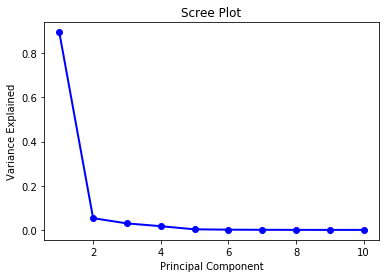

In [58]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [59]:
pca.explained_variance_ratio_

array([8.94793847e-01, 5.33063190e-02, 2.95813790e-02, 1.69395556e-02,
       2.84953664e-03, 1.17211604e-03, 5.63789507e-04, 2.76114341e-04,
       1.52979914e-04, 9.71114443e-05])

In [60]:
sum(pca.explained_variance_ratio_)

0.9997327480279211

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
# the independent variables set 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

  feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0
5     PC6  1.0
6     PC7  1.0
7     PC8  1.0
8     PC9  1.0
9    PC10  1.0


### Linear Regression

In [22]:
x = pca_df.drop('HB',axis = 1)
Y = pca_df['HB']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2 , random_state = 0)

In [23]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cv_score_lr = cross_val_score(lr,x,Y, cv=5, scoring = 'r2')
max(cv_score_lr)

0.13258110930680722

#### Execution time by linear model on the PCA data

In [24]:
import time
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
print(end - start)

0.04188895225524902


#### Model Accuracy

In [25]:
score_lr = lr.score(X_test,y_test)
print("R square is "  + str(score_lr))
radj_lr1 = 1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_lr1))

R square is 0.1420938539991472
Adjusted R-square is 0.1416721127023225


#### Model Summary

In [26]:
print('Linear Regression Intercept:' + str(lr.intercept_))
print('Linear Regresssion Coefficient:' + str(lr.coef_))

Linear Regression Intercept:11.513340251142177
Linear Regresssion Coefficient:[ 0.02270351  0.18364551 -0.14241392 -0.28298097 -0.16258919  0.11720669
  0.10013539  0.75884055  0.1467545  -0.96937726]


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
cv_score_rf = cross_val_score(rf,X_train,y_train, cv=5, scoring = 'r2')
max(cv_score_rf)

0.9508158318143056

#### Model Accuracy

In [28]:
rf.fit(X_train,y_train)
score_rf = rf.score(X_test,y_test)
print("R square is "  + str(score_rf))
radj_rf1 = 1 - (1-rf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_rf1))

R square is 0.9570839918255737
Adjusted R-square is 0.957062894584312


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
tuned_param={'max_depth':range(1,11),'n_estimators':range(1,11)}
model=GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid=tuned_param,return_train_score=True)
model.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
tuned_param={'max_depth':range(1,50),'n_estimators':range(1,100)}
model1=GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid=tuned_param,return_train_score=True)
model1.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [31]:
print("Best hyper paramters:",model.best_params_)
print("Best accuracy value: ",model.best_score_ )

Best hyper paramters: {'max_depth': 10, 'n_estimators': 10}
Best accuracy value:  0.6410111531469562


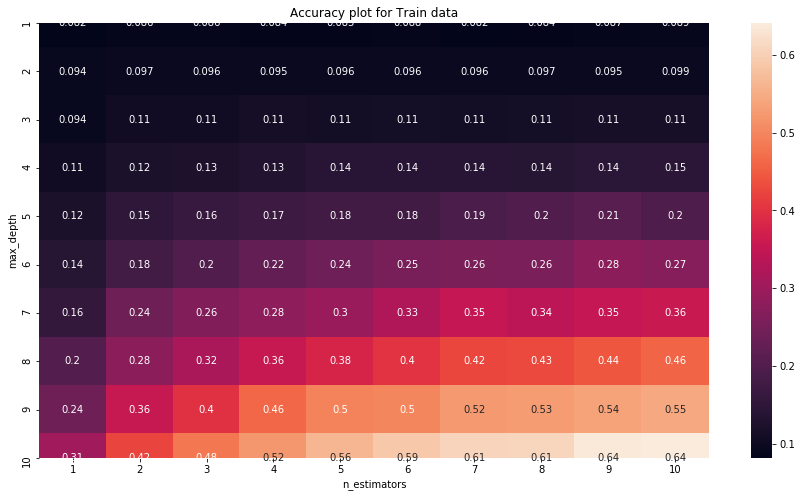

In [39]:
ac_df=pd.DataFrame(model.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=model.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
m = sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Train data")
plt.savefig("RFHeatMap.jpg")

### Support Vector Machine

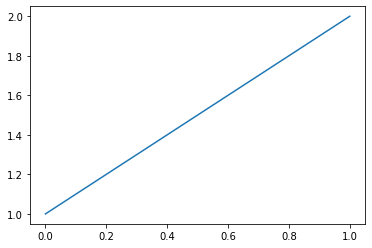

In [35]:
plt.plot()
plt.savefig('image.jpg')

In [62]:
#SVM
from sklearn.svm import SVR
reg_lin = SVR(kernel = 'linear')
reg_lin.fit(X_train, y_train)
score_svr_linear = reg_lin.score(X_test,y_test)
print(score_svr_linear)

0.12502058196306876


In [ ]:
from sklearn.svm import SVR
reg_poly = SVR(kernel = 'poly')
reg_poly.fit(X_train, y_train)
score_svr_poly = reg_poly.score(X_test,y_test)
print(score_svr_poly)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
lw = 2
svrs = [reg_lin, reg_poly]
kernel_label = ["Linear", "Polynomial"]
model_color = ["m", "c"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [28]:
xs = 0.1167
print(1 - (1-xs)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.11626577524333903


### XGBoost

In [43]:
#XGBoost
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror', booster='gbtree')
RegModel.fit(X_train,y_train)
score_xgb = RegModel.score(X_test,y_test)

In [44]:
score_xgb

0.5151674249218674

## Model with age as a continuous variable and gender as a binary variable

In [31]:
with_ga.describe()
ga = pd.get_dummies(with_ga)

In [30]:
ga.head()

,Serial,Age,s0,s1,s2,s3,s4,s5,s6,s7,...,s93,s94,s95,s96,s97,s98,s99,HB,Gender_Female,Gender_Male
0,3790,21.0,1.111572,1.089060,1.070785,1.054095,1.038819,1.022716,1.010897,0.997921,...,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5,1,0
1,3801,28.0,1.094853,1.077337,1.063737,1.050125,1.036282,1.021623,1.011224,0.999654,...,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0,0,1
2,3803,27.0,0.926640,0.911944,0.899565,0.887503,0.872969,0.857463,0.846463,0.835331,...,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3,0,1
3,3832,27.0,0.885337,0.871370,0.855679,0.837118,0.816210,0.794550,0.778399,0.763338,...,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0,1,0
4,3833,21.0,0.997230,0.980019,0.967419,0.954938,0.940028,0.922851,0.910277,0.897755,...,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5,0,1


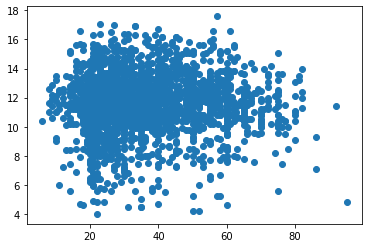

In [33]:
mean = ga.groupby('Serial').mean()
plt.scatter(mean['Age'], mean['HB'])

In [32]:
#Female == 1
ga1 = ga.drop('Gender_Male' , axis = 1)
ga1.head()
ga1.rename({'Gender_Female':"Gender"} , axis = 1)

,Serial,Age,s0,s1,s2,s3,s4,s5,s6,s7,...,s92,s93,s94,s95,s96,s97,s98,s99,HB,Gender
0,3790,21.0,1.111572,1.089060,1.070785,1.054095,1.038819,1.022716,1.010897,0.997921,...,0.548618,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5,1
1,3801,28.0,1.094853,1.077337,1.063737,1.050125,1.036282,1.021623,1.011224,0.999654,...,0.580230,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0,0
2,3803,27.0,0.926640,0.911944,0.899565,0.887503,0.872969,0.857463,0.846463,0.835331,...,0.483731,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3,0
3,3832,27.0,0.885337,0.871370,0.855679,0.837118,0.816210,0.794550,0.778399,0.763338,...,0.431123,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0,1
4,3833,21.0,0.997230,0.980019,0.967419,0.954938,0.940028,0.922851,0.910277,0.897755,...,0.537118,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,1272,60.0,0.944481,0.936851,0.933647,0.924879,0.914422,0.905567,0.898337,0.891043,...,0.505947,0.502221,0.499196,0.495792,0.492888,0.489912,0.487988,0.486480,12.0,1
101761,1272,60.0,0.953750,0.943192,0.938576,0.930557,0.920534,0.911944,0.905013,0.897771,...,0.508857,0.505084,0.503612,0.501019,0.498227,0.494874,0.491237,0.489598,12.0,1
101762,1272,60.0,0.950452,0.941978,0.936802,0.927402,0.917317,0.908880,0.901772,0.894222,...,0.506535,0.502254,0.500789,0.498837,0.496110,0.491385,0.488431,0.487415,12.0,1
101763,1272,60.0,0.955741,0.946137,0.941490,0.932453,0.921778,0.912469,0.905354,0.898180,...,0.511350,0.507332,0.504680,0.502769,0.500643,0.497776,0.492578,0.489961,12.0,1


<AxesSubplot:>

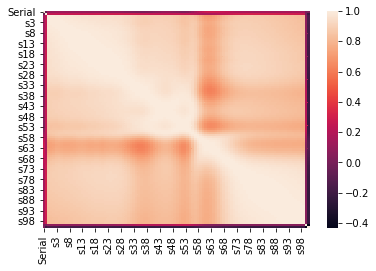

In [33]:
corr_df = ga1.corr()
sns.heatmap(corr_df)

In [34]:
X_ga = ga1.drop(['Serial','HB'] , axis = 1)
y_ga = ga1['HB']

In [35]:
scale_ga = sc.fit_transform(X_ga)
pca_ga = pca.fit_transform(scale_ga)

In [36]:
pca_df_ga = pd.DataFrame(pca_ga , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df_ga['HB'] = y_ga

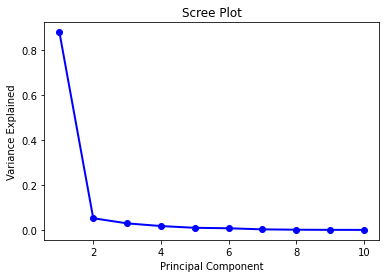

In [37]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [38]:
sum(pca.explained_variance_ratio_)

0.9994987429560408

In [39]:
pca_df_ga1 = pca_df_ga.dropna()
x_ga = pca_df_ga1.drop('HB',axis = 1)
Y_ga = pca_df_ga1['HB']

#### Linear Regression

In [41]:
X_tra,X_tes,y_tra,y_tes = train_test_split(x_ga,Y_ga,test_size = 0.2 , random_state = 0)
lr.fit(X_tra,y_tra)
score_lr_ga = lr.score(X_tes,y_tes)
score_lr_ga
radj_lr = 1 - (1-lr.score(X_tes, y_tes))*(len(y_tes)-1)/(len(y_tes)-X_tes.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_lr))

Adjusted R-square is 0.04169528430298597


In [42]:
cv_score_lr = cross_val_score(lr,x_ga,Y_ga, cv=5, scoring = 'r2')
max(cv_score_lr)

-0.005813904563467753

#### Random Forest

In [75]:
rf.fit(X_tra,y_tra)
score_rf_ga = rf.score(X_tes,y_tes)
score_rf_ga
radj_rf = 1 - (1-rf.score(X_tes, y_tes))*(len(y_tes)-1)/(len(y_tes)-X_tes.shape[1]-1)
print('Adjusted R-square is ' +  str(radj_rf))

Adjusted R-square is 0.8293058624296733


In [40]:
cv_score_rf = cross_val_score(rf,X_tra,y_tra, cv=5, scoring = 'r2')
max(cv_score_rf)

0.8158317327784781

#### Support Vector Machine

In [43]:
#SVM
from sklearn.svm import SVR
reg_lin = SVR(kernel = 'linear')
reg_lin.fit(X_tra, y_tra)
score_svr_linear_ga = reg_lin.score(X_tes,y_tes)
print(score_svr_linear_ga)

0.03181676639196329


In [46]:
from sklearn.svm import SVR
reg_poly = SVR(kernel = 'poly')
reg_poly.fit(X_tra, y_tra)
score_svr_poly_ga = reg_poly.score(X_tes,y_tes)
print(score_svr_poly_ga)

0.04363670081964299


#### XGBoost

In [45]:
RegModel.fit(X_tra,y_tra)
score_xgb_ga = RegModel.score(X_tes,y_tes)

In [46]:
score_xgb_ga

0.3908771786598876

In [68]:
rel = ga[['Age' , 'HB']]
my_r = rel.corr(method="spearman")
print(my_r)

          Age        HB
Age  1.000000  0.018792
HB   0.018792  1.000000


In [69]:
from scipy import stats
stats.kruskal(ga['Age'], ga['HB'])

KruskalResult(statistic=143176.1895606565, pvalue=0.0)